# Лабораторная работа: кластеризация

## Разделение изображения на семантические компоненты

Загрузите изображение

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (9,5)

RANDOM_STATE = 7
np.random.seed(RANDOM_STATE)

In [2]:
BASE_PATH = r"../data/hw3_%s"

fig, ax = plt.subplots(1, 2)
images = (
    plt.imread(BASE_PATH % ('bizon.jpg')),
    plt.imread(BASE_PATH % ('cat.jpg'))
)

for idx, img in enumerate(images):
    _ = ax[idx].imshow(img)
    _ = ax[idx].set_title(img.shape)

**1. (1 балл)** На каждом изображении, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель следующим образом [$\lambda x_i,\lambda y_i,r_i,g_i,b_i$], где $x_i$ и $y_i$ — координаты пикселя, $r_i$,$g_i$,$b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

In [3]:
from sklearn.cluster import KMeans

In [70]:
pixels = [np.array([[idx, jdx, *img[idx, jdx]] 
                    for idx in range(img.shape[0]) 
                    for jdx in range(img.shape[1])]) for img in images]

In [67]:
kmeans = KMeans()
kmeans.fit(pixels[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**2. (0.5 балл)** Визуализируйте результаты сегментации.

**3. (1 балл)** 
Выделите сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету.
 
**4. (0.5 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше).

**5. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два метода сегментации.

**6. (0.5 балл)**
Насколько хорошо выделяются объекты на изображениях?

### Алгоритм спектральной кластеризации
[статья](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)

* определить матрицу сходства $A$, используя Гауссово ядрор $K$ ($A_{i,j}\sim exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $) или просто матрице смежности (например $A_{i,j}=\delta_{i,j}$),
* построить лапласиан по $A$, например $L=D-A$ - простой, $L_{N}=D^{-1/2}LD^{-1/2}$ - нормализованный, где $D_{i,i}=\sum^{n}_{j}a_{i,j}$ - диагональная матрица,
* свойство лапласиана - $x^{T}Lx=\frac{1}{2}\sum_{i,j=1}^{n}w_{i,j}\Vert x_{i}-x_{j}\Vert^{2}$,
* найти собственные значения $L v=\lambda v$   (или решить обобщенную задачу $L v=\lambda D v$ )
* выбрать $k$ собтвенных векторов $\{ v_{i}, i=1, k \}$, соответствующих $k$ наименьшим (или наибольшим) собственным значениям  $\{ \lambda_{i}, i=1, k \}$ , и задать $k$-мерное подпространство $P^{T}LP$,
* найти кластеры в этом подпространстве.

**7. (2 доп. балла)** Визуализируйте первые несколько собственных векторов, соответствующие самым маленьким собственным числам.
Для этого вам надо более детально ознакомиться с тем, как  работает алгоритм (см. [статью](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)).

Вам может помочь [исходный код sklearn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/spectral_embedding_.py#L133) и функции из scipy: eigh, eigsh, lobpcg.


## Сжатие информации с помощью SVD

Выберите любую из картинок.
Приведите ее к серому цвету.

Чёрно-белая картинка - матрица, элементы которой - насыщенность серого цвета каждого из пикселей.

**Замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.


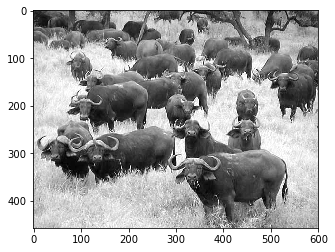

In [3]:
img = imread(r'bizon.jpg')[:,:,0]# матрица интенсивностей
plt.gray()
imgplot = plt.imshow(img)
plt.show()

**8. (1 балл)** Постройте сингулярное разложение этой матрицы (не центрируя данные). 

**9. (1 балл)** Визуализуйте первую главную компоненту. Что получилось? Почему?

**10. (0.5 балл)** Визуализуйте компоненты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Что получилось и почему?
Сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения?

**11. (0.5 балл)** Как изменится результат, если сначала вы центрируете данные?

